<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp/blob/main/Daily_Challenge_W6D5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from datetime import datetime

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [12]:
import plotly.express as px

In [17]:
from scipy.stats import skew, kurtosis

In [15]:
import scipy as sc
import scipy.stats as stats
import numpy as np

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/devtlv/DailyChallenge-DataAnalysis-W6D5-Mobile_Price_Classification/main/train.csv")

In [6]:
print(df.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [7]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

0) battery_power: The battery power of the mobile phone, typically measured in mAh (milliampere-hour). It represents the capacity of the battery and determines how long the phone can last on a single charge.

1) blue: A binary feature indicating whether the phone supports Bluetooth connectivity. It has a value of 1 if Bluetooth is supported and 0 if not.

2) clock_speed: The speed of the processor clock, usually measured in GHz (gigahertz). It indicates how quickly the processor can execute instructions.

3) dual_sim: A binary feature indicating whether the phone has dual SIM card support. It has a value of 1 if dual SIM support is available and 0 if not.

4) fc: The primary camera resolution of the phone, measured in megapixels (MP). It represents the quality and resolution of the photos captured by the phone's primary camera.

5) four_g: A binary feature indicating whether the phone supports 4G network connectivity. It has a value of 1 if 4G is supported and 0 if not.

6) int_memory: The internal memory (RAM) of the phone, typically measured in gigabytes (GB). It represents the amount of memory available for storing apps, data, and other files.

7) m_dep: The mobile depth or thickness of the phone, usually measured in centimeters (cm). It indicates how slim or thick the phone is.

8) mobile_wt: The weight of the phone, usually measured in grams (g). It represents the physical weight of the device.

9) n_cores: The number of processor cores in the phone's CPU (Central Processing Unit). It indicates the multitasking capabilities and overall performance of the processor.

10) pc: The pixel resolution of the phone's secondary camera, measured in megapixels (MP). It represents the quality and resolution of the photos captured by the phone's secondary (front-facing) camera.

11) px_height: The height of the phone's display screen in pixels. It represents the vertical resolution of the screen.

12) px_width: The width of the phone's display screen in pixels. It represents the horizontal resolution of the screen.

13) ram: The Random Access Memory (RAM) of the phone, usually measured in gigabytes (GB). It represents the amount of memory available for running apps and processes.

14) sc_h: The height of the phone's screen in centimeters (cm). It represents the physical height of the display screen.

15) sc_w: The width of the phone's screen in centimeters (cm). It represents the physical width of the display screen.

16) talk_time: The talk time of the phone, typically measured in hours. It represents the maximum duration for which the phone can be used for voice calls on a single charge.

17) three_g: A binary feature indicating whether the phone supports 3G network connectivity. It has a value of 1 if 3G is supported and 0 if not.

18) touch_screen: A binary feature indicating whether the phone has a touchscreen display. It has a value of 1 if the phone has a touchscreen and 0 if not.

19) wifi: A binary feature indicating whether the phone supports Wi-Fi connectivity. It has a value of 1 if Wi-Fi is supported and 0 if not.

20) price_range: The price range category of the mobile phone, which typically categorizes phones into different price brackets or tiers. It's often used as the target variable for machine learning models predicting the price range of a phone based on its features.

In [10]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


3. Statistical Analysis With NumPy And SciPy:

Execute detailed statistical analysis on each feature, including:

Calculation of central tendency measures (mean, median, mode).

Analysis of variability (range, variance, standard deviation).

Evaluation of distribution shapes through skewness and kurtosis.

Perform hypothesis testing for statistical significance between groups (e.g., different price ranges).

Investigate feature-target correlations using SciPy.

Apply advanced SciPy statistical functions for deeper insights.

In [13]:
# heatmap of correlation

fig = px.imshow((df.corr()).round(2), text_auto=True, aspect="auto")
fig.update_layout(title='Heatmap of Correlation', width=800, height=600)
fig.show()
# count variance
df.var()

battery_power    1.930884e+05
blue             2.501001e-01
clock_speed      6.658629e-01
dual_sim         2.500348e-01
fc               1.884813e+01
four_g           2.496626e-01
int_memory       3.292670e+02
m_dep            8.318353e-02
mobile_wt        1.253136e+03
n_cores          5.234197e+00
pc               3.677592e+01
px_height        1.969414e+05
px_width         1.867964e+05
ram              1.176644e+06
sc_h             1.775143e+01
sc_w             1.897820e+01
talk_time        2.985481e+01
three_g          1.817086e-01
touch_screen     2.501161e-01
wifi             2.500760e-01
price_range      1.250625e+00
dtype: float64

In [14]:
def display_unique_values(df):
    """
    Display unique values of each column in a DataFrame.

    Parameters:
    - df: DataFrame object

    Returns:
    None
    """
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique data of {column} column: {unique_values}")

# Example usage:
display_unique_values(df)

Unique data of battery_power column: [ 842 1021  563 ... 1139 1467  858]
Unique data of blue column: [0 1]
Unique data of clock_speed column: [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
Unique data of dual_sim column: [0 1]
Unique data of fc column: [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
Unique data of four_g column: [0 1]
Unique data of int_memory column: [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
Unique data of m_dep column: [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
Unique data of mobile_wt column: [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 10

In [16]:
for column in df.columns:
  col_mean = np.mean(df[column])
  col_median = np.median(df[column])
  col_var = np.var(df[column])
  col_std = np.std(df[column])
  col_mode,number_of_elem = stats.mode(df[column])
  print(f'Statistics for {column}:\nmean: {col_mean}\nmedian: {col_median}\nvariance:{col_var}\nstandard deviation: {col_std}\nmode: {col_mode}')
  print('--------')

Statistics for battery_power:
mean: 1238.5185
median: 1226.0
variance:192991.81565775
standard deviation: 439.3083377967575
mode: 618
--------
Statistics for blue:
mean: 0.495
median: 0.0
variance:0.24997499999999997
standard deviation: 0.4999749993749687
mode: 0
--------
Statistics for clock_speed:
mean: 1.52225
median: 1.5
variance:0.6655299375
standard deviation: 0.8158001823363366
mode: 0.5
--------
Statistics for dual_sim:
mean: 0.5095
median: 1.0
variance:0.24990975
standard deviation: 0.499909741853467
mode: 1
--------
Statistics for fc:
mean: 4.3095
median: 3.0
variance:18.838709749999996
standard deviation: 4.340358251342854
mode: 0
--------
Statistics for four_g:
mean: 0.5215
median: 1.0
variance:0.24953775000000003
standard deviation: 0.49953753612716634
mode: 1
--------
Statistics for int_memory:
mean: 32.0465
median: 32.0
variance:329.10233775
standard deviation: 18.141177959272657
mode: 27
--------
Statistics for m_dep:
mean: 0.50175
median: 0.5
variance:0.083141937500000

In [19]:
# Calculate skewness and kurtosis for each column
for column_name, column_values in df.items():
    close_skewness = skew(column_values)
    close_kurtosis = kurtosis(column_values)

    print(f"Skewness of {column_name} column:", close_skewness)
    print(f"Kurtosis of {column_name} column:", close_kurtosis)
    print('------')

Skewness of battery_power column: 0.03187454295305568
Kurtosis of battery_power column: -1.224084165725428
------
Skewness of blue column: 0.02000100007500624
Kurtosis of blue column: -1.9995999599959997
------
Skewness of clock_speed column: 0.17795052935349268
Kurtosis of clock_speed column: -1.3231094949498647
------
Skewness of dual_sim column: -0.03800686085763292
Kurtosis of dual_sim column: -1.9985554785277484
------
Skewness of fc column: 1.0190463925723268
Kurtosis of fc column: 0.27338561771466496
------
Skewness of four_g column: -0.08607961742649396
Kurtosis of four_g column: -1.9925902994637084
------
Skewness of int_memory column: 0.05784590180779676
Kurtosis of int_memory column: -1.2160344731958939
------
Skewness of m_dep column: 0.08901518436117652
Kurtosis of m_dep column: -1.2741637414186793
------
Skewness of mobile_wt column: 0.0065532377855500356
Kurtosis of mobile_wt column: -1.2103511507234548
------
Skewness of n_cores column: 0.0036247871155484306
Kurtosis of

In [22]:
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=np.number).columns
categorical_features = df.select_dtypes(include='object').columns

# Perform hypothesis testing for numerical features
for column in numerical_features:
    stat, p_value = stats.shapiro(df[column])
    if p_value > 0.05:
        f_stat, p_value = stats.f_oneway(
            *[df[df['price_range'] == i][column] for i in range(4)]
        )
        if p_value < 0.05:
            print(f"Significant difference in {column} across price ranges (p-value: {p_value})")
    else:
        stat, p_value = stats.kruskal(
            *[df[df['price_range'] == i][column] for i in range(4)]
        )
        if p_value < 0.05:
            print(f"Significant difference in {column} across price ranges (p-value: {p_value})")

# Perform chi-square test for categorical features
for column in categorical_features:
    crosstab = pd.crosstab(df['price_range'], df[column])
    stat, p_value, _, _ = stats.chi2_contingency(crosstab)
    if p_value < 0.05:
        print(f"Significant association between {column} and price range (p-value: {p_value})")

Significant difference in battery_power across price ranges (p-value: 2.0483291081148915e-19)
Significant difference in int_memory across price ranges (p-value: 0.032533148942589206)
Significant difference in mobile_wt across price ranges (p-value: 0.012744503689937405)
Significant difference in n_cores across price ranges (p-value: 0.0485924292583193)
Significant difference in px_height across price ranges (p-value: 3.180105022964664e-10)
Significant difference in px_width across price ranges (p-value: 4.4770998222327646e-14)
Significant difference in ram across price ranges (p-value: 0.0)
Significant difference in price_range across price ranges (p-value: 0.0)


In [29]:
import plotly.graph_objects as go


price_categories = ['low cost', 'medium cost', 'high cost', 'very high cost']
bins = [500, 1000, 1500, 2000]
labels = ['500-1000', '1001-1500', '1501-2000']

# Define battery power groups
df['battery_power_group'] = pd.cut(df['battery_power'], bins=bins, labels=labels, right=False)

# Create pivot table
pivot_table_battery = pd.pivot_table(df,
                                     values='battery_power',
                                     index='battery_power_group',
                                     columns=pd.cut(df['price_range'], bins=len(price_categories), labels=price_categories),
                                     aggfunc='count').fillna(0)  # Fill missing values with zeros
print(pivot_table_battery)
# Create heatmap
fig = go.Figure(data=go.Heatmap(z=pivot_table_battery.values,
                                 x=price_categories,
                                 y=labels,
                                 colorscale='Viridis'))

# Update layout
fig.update_layout(title='Battery Power vs Price Range',
                  xaxis_title='Price Range',
                  yaxis_title='Battery Power Group',
                  width=800,
                  height=600)

# Show plot
fig.show()


price_range          low cost  medium cost  high cost  very high cost
battery_power_group                                                  
500-1000                  225          169        187             114
1001-1500                 168          178        139             158
1501-2000                 107          153        174             228


In [60]:
# Define the price categories
price_categories = ['low cost', 'medium cost', 'high cost', 'very high cost']

# Filter out non-numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Iterate through each numerical column in the DataFrame
for column in numeric_columns:
    # Skip the 'price_range' column as it's our target variable
    if column == 'price_range':
        continue

    # Define the bins based on the mean value of the column
    mean_value = df[column].mean()
    bins = [-float('inf'), mean_value, float('inf')]

    # Create a new column indicating whether the value is above or below the mean
    df['above_mean'] = pd.cut(df[column], bins=[-float('inf'), mean_value, float('inf')], labels=['No', 'Yes'])

    # Create pivot table by price range counting phones with and without the feature
    pivot_table = pd.pivot_table(df,
                                  values='price_range',
                                  index='above_mean',
                                  columns=pd.cut(df['price_range'], bins=len(price_categories), labels=price_categories),
                                  aggfunc='count')

    print(f"\nPivot Table for {column} by Price Range:")
    print(pivot_table)

    # Create a grouped bar plot
    fig = go.Figure(data=[
        go.Bar(name='Low Cost', x=pivot_table.columns, y=pivot_table.loc['No'], text=pivot_table.loc['No']),
        go.Bar(name='High Cost', x=pivot_table.columns, y=pivot_table.loc['Yes'], text=pivot_table.loc['Yes'])
    ])

    fig.update_layout(title_text=f'Phones with {column} below and above mean by Price Range',
                      xaxis_title="Price Range",
                      yaxis_title="Count",
                      barmode='group',
                      width=800,
                      height=600)
    fig.show()


Pivot Table for battery_power by Price Range:
price_range  low cost  medium cost  high cost  very high cost
above_mean                                                   
No                321          259        258             176
Yes               179          241        242             324



Pivot Table for blue by Price Range:
price_range  low cost  medium cost  high cost  very high cost
above_mean                                                   
No                257          255        257             241
Yes               243          245        243             259



Pivot Table for clock_speed by Price Range:
price_range  low cost  medium cost  high cost  very high cost
above_mean                                                   
No                250          270        258             262
Yes               250          230        242             238



Pivot Table for dual_sim by Price Range:
price_range  low cost  medium cost  high cost  very high cost
above_mean                                                   
No                250          245        251             235
Yes               250          255        249             265



Pivot Table for fc by Price Range:
price_range  low cost  medium cost  high cost  very high cost
above_mean                                                   
No                311          304        286             310
Yes               189          196        214             190



Pivot Table for four_g by Price Range:
price_range  low cost  medium cost  high cost  very high cost
above_mean                                                   
No                241          238        253             225
Yes               259          262        247             275



Pivot Table for int_memory by Price Range:
price_range  low cost  medium cost  high cost  very high cost
above_mean                                                   
No                275          252        270             229
Yes               225          248        230             271



Pivot Table for m_dep by Price Range:
price_range  low cost  medium cost  high cost  very high cost
above_mean                                                   
No                286          264        280             275
Yes               214          236        220             225



Pivot Table for mobile_wt by Price Range:
price_range  low cost  medium cost  high cost  very high cost
above_mean                                                   
No                246          249        228             273
Yes               254          251        272             227



Pivot Table for n_cores by Price Range:
price_range  low cost  medium cost  high cost  very high cost
above_mean                                                   
No                247          280        238             244
Yes               253          220        262             256



Pivot Table for pc by Price Range:
price_range  low cost  medium cost  high cost  very high cost
above_mean                                                   
No                250          242        235             239
Yes               250          258        265             261



Pivot Table for px_height by Price Range:
price_range  low cost  medium cost  high cost  very high cost
above_mean                                                   
No                331          264        295             234
Yes               169          236        205             266



Pivot Table for px_width by Price Range:
price_range  low cost  medium cost  high cost  very high cost
above_mean                                                   
No                292          263        259             194
Yes               208          237        241             306



Pivot Table for ram by Price Range:
price_range  low cost  medium cost  high cost  very high cost
above_mean                                                   
No                500          407         84               0
Yes                 0           93        416             500



Pivot Table for sc_h by Price Range:
price_range  low cost  medium cost  high cost  very high cost
above_mean                                                   
No                254          259        275             223
Yes               246          241        225             277



Pivot Table for sc_w by Price Range:
price_range  low cost  medium cost  high cost  very high cost
above_mean                                                   
No                262          292        273             261
Yes               238          208        227             239



Pivot Table for talk_time by Price Range:
price_range  low cost  medium cost  high cost  very high cost
above_mean                                                   
No                284          244        262             266
Yes               216          256        238             234



Pivot Table for three_g by Price Range:
price_range  low cost  medium cost  high cost  very high cost
above_mean                                                   
No                127          122        113             115
Yes               373          378        387             385



Pivot Table for touch_screen by Price Range:
price_range  low cost  medium cost  high cost  very high cost
above_mean                                                   
No                238          239        265             252
Yes               262          261        235             248



Pivot Table for wifi by Price Range:
price_range  low cost  medium cost  high cost  very high cost
above_mean                                                   
No                252          248        248             238
Yes               248          252        252             262


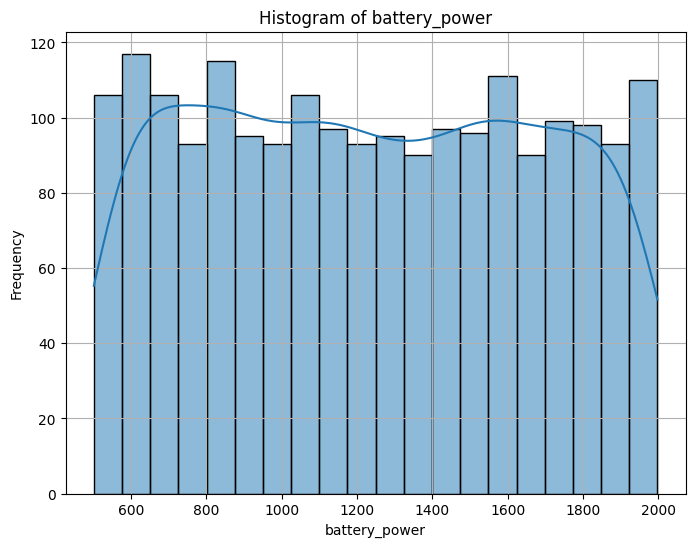

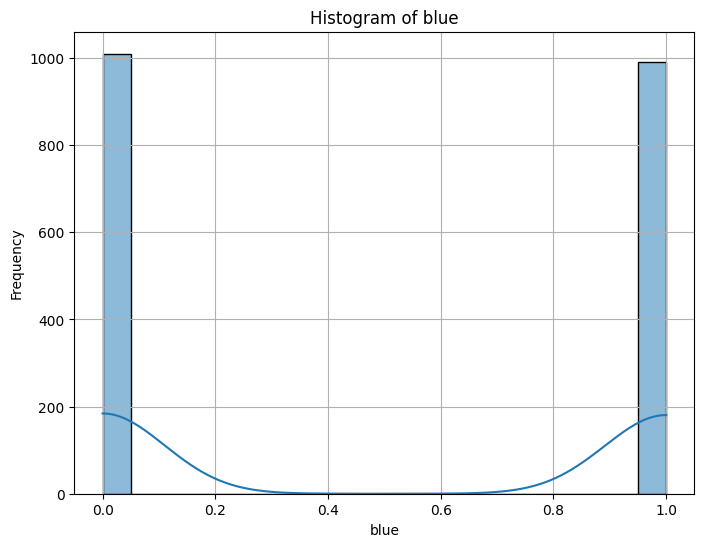

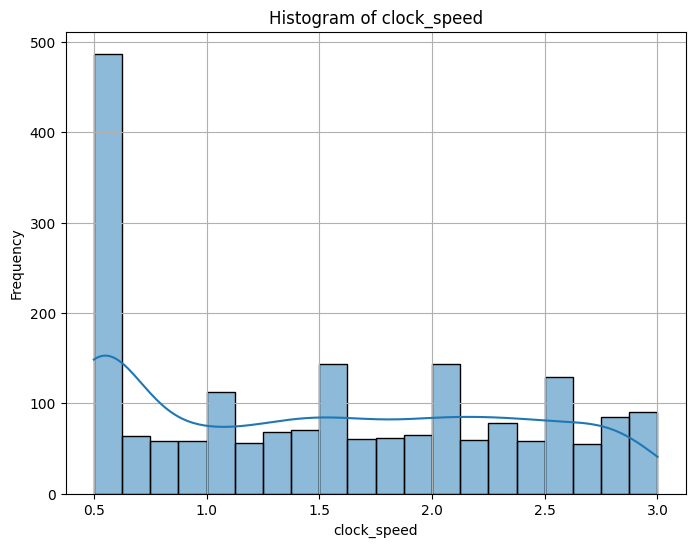

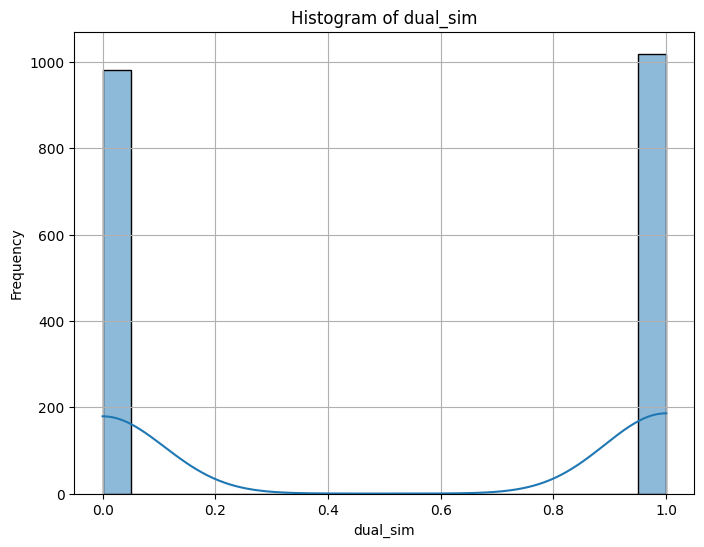

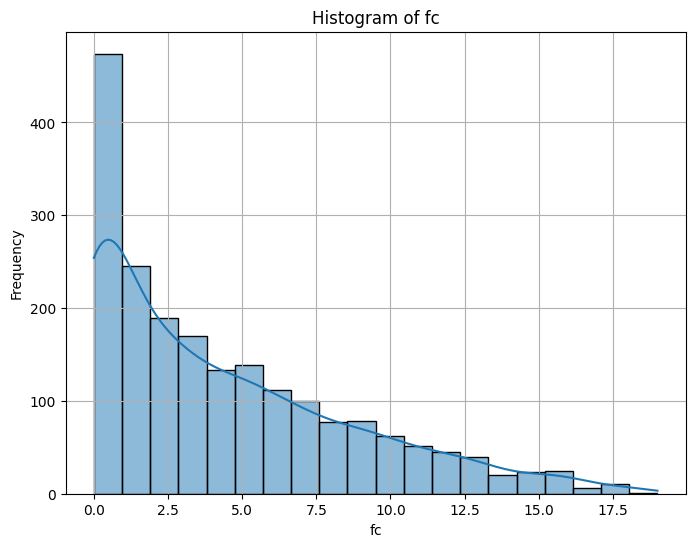

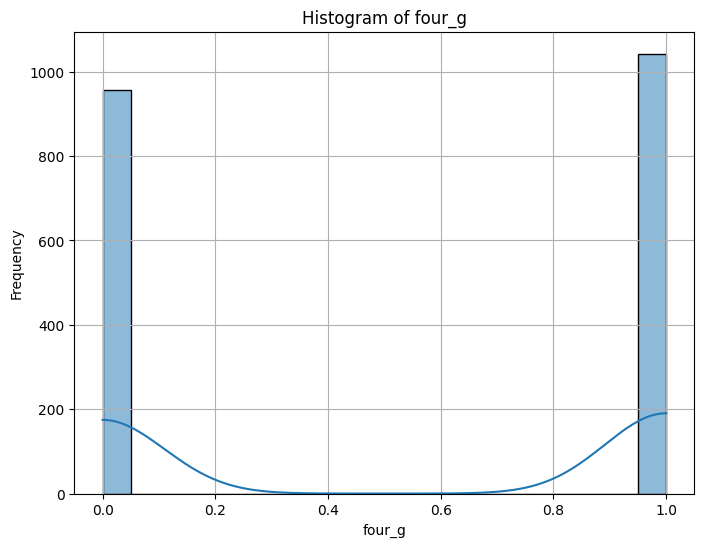

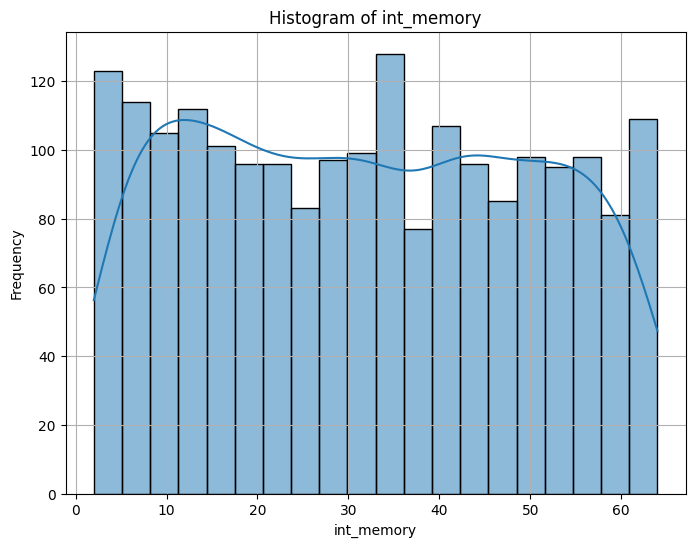

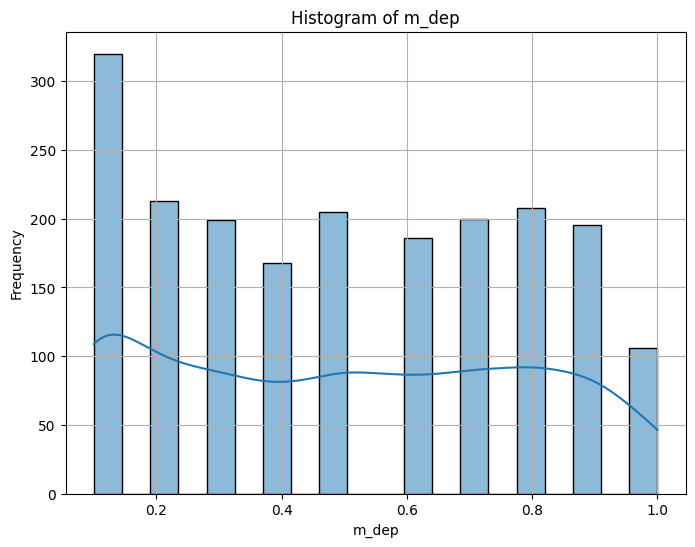

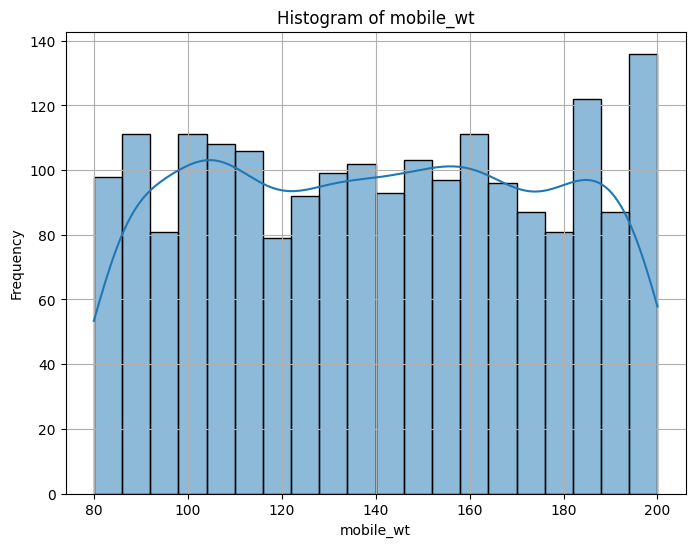

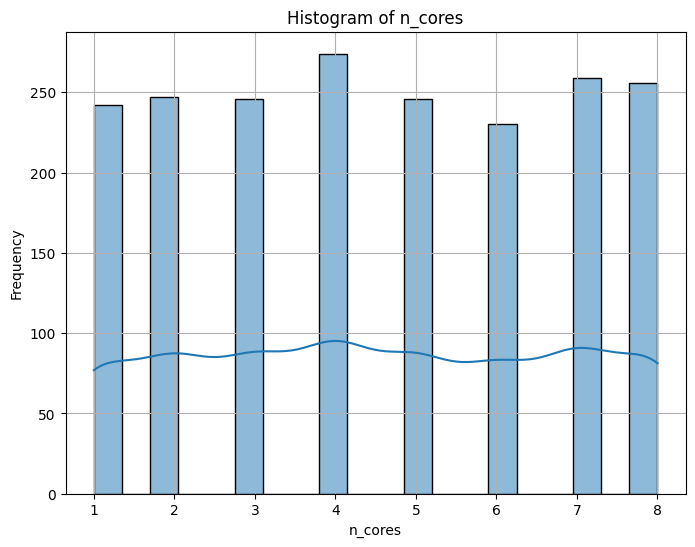

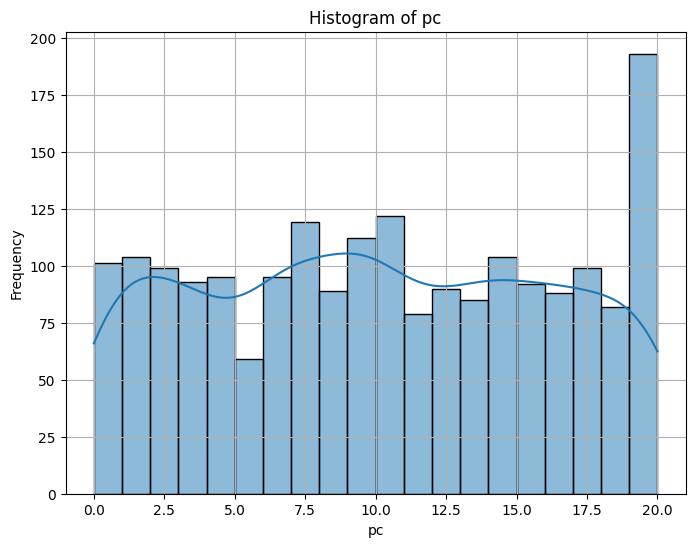

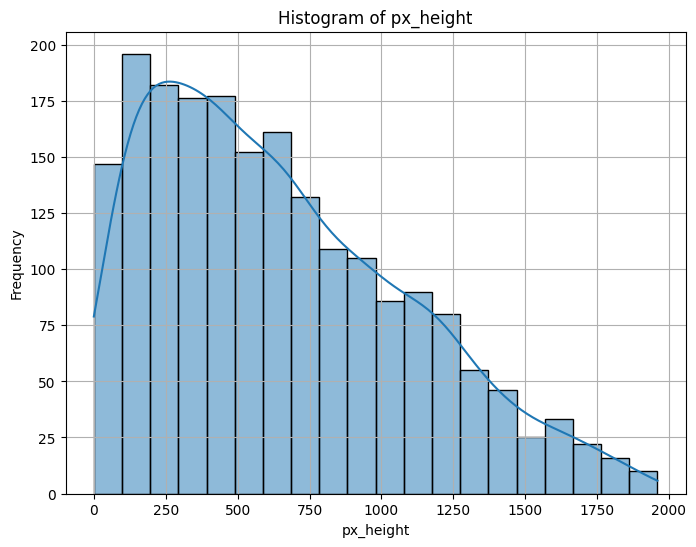

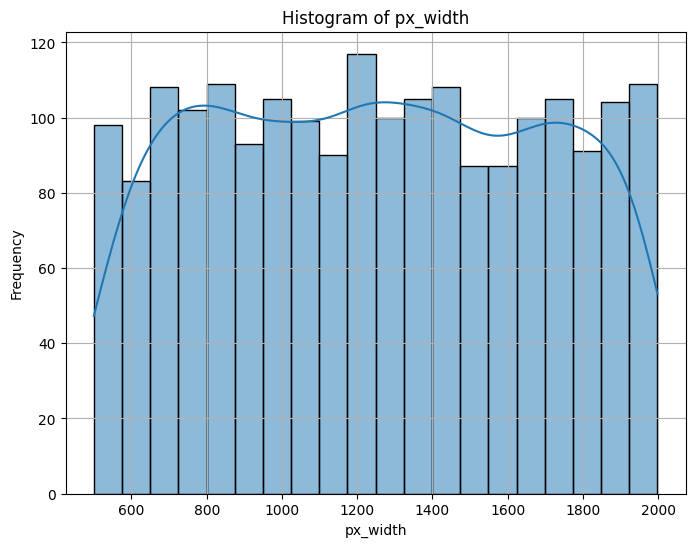

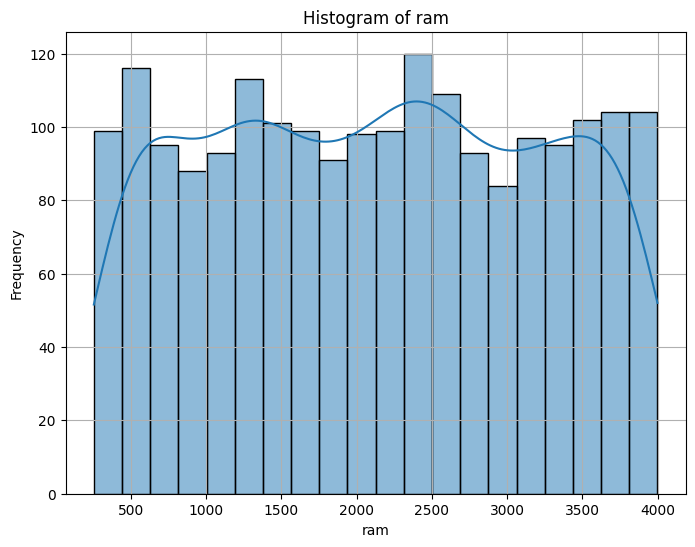

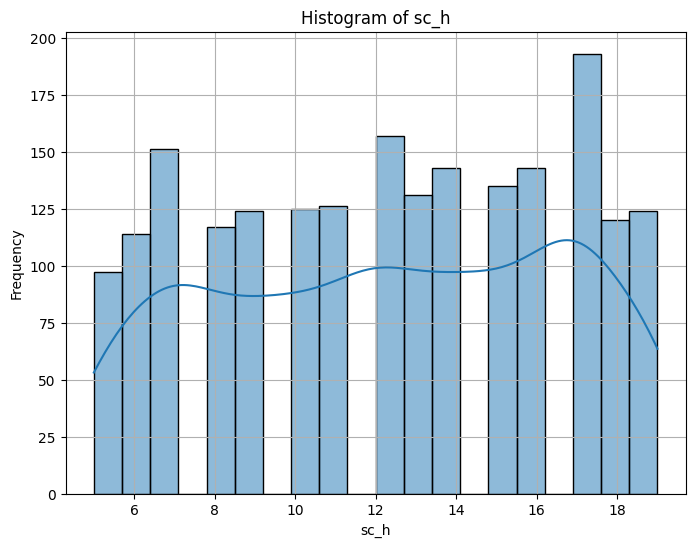

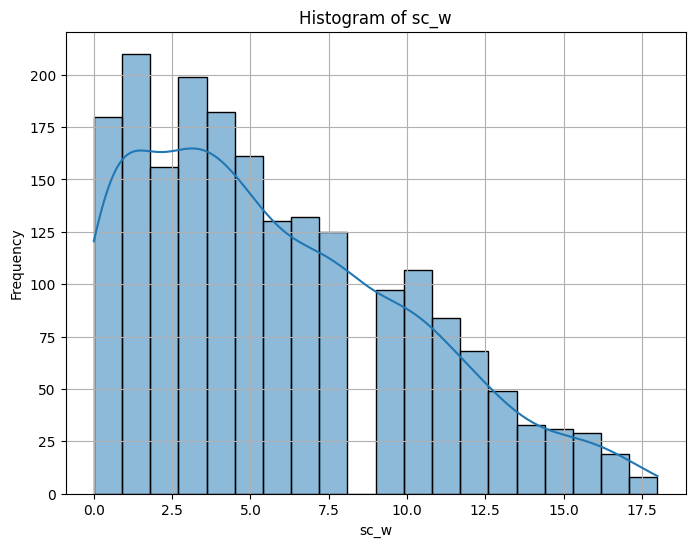

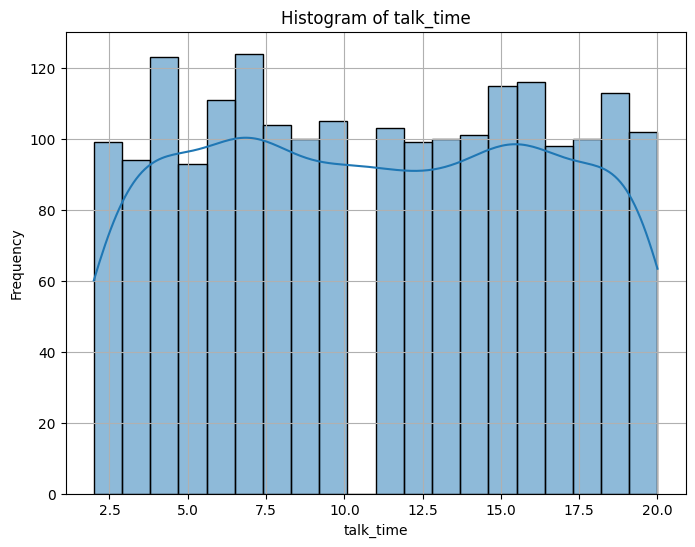

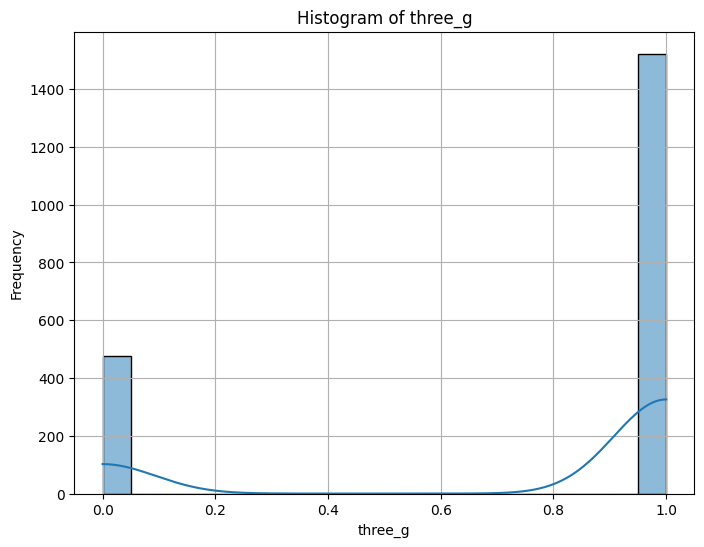

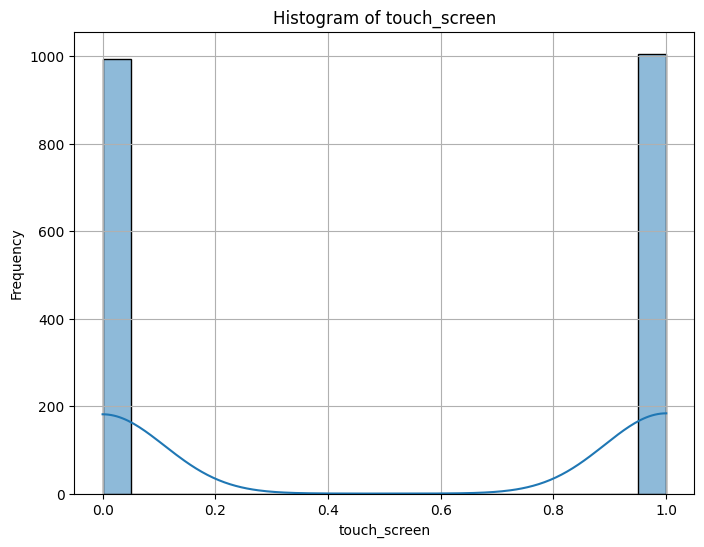

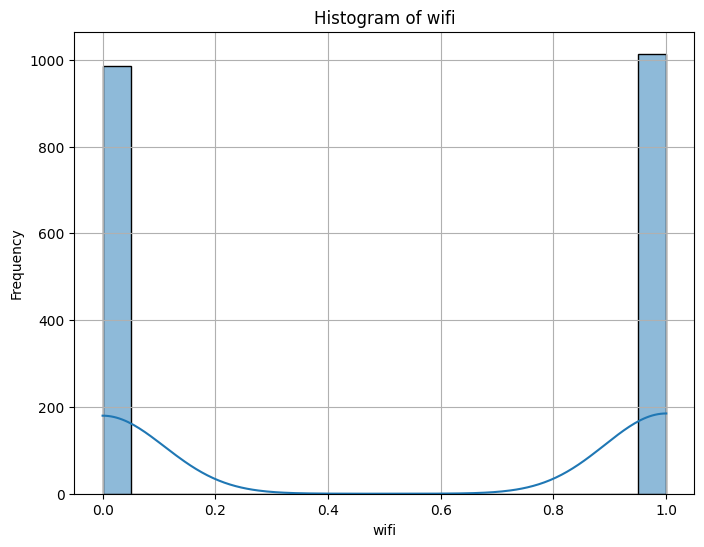

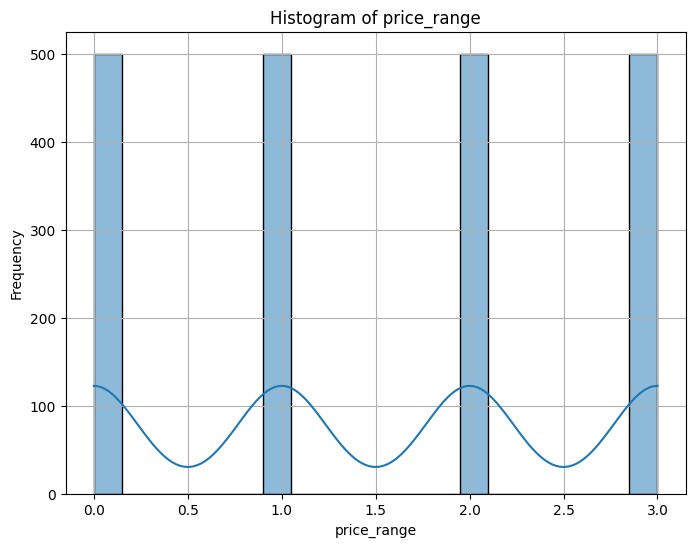

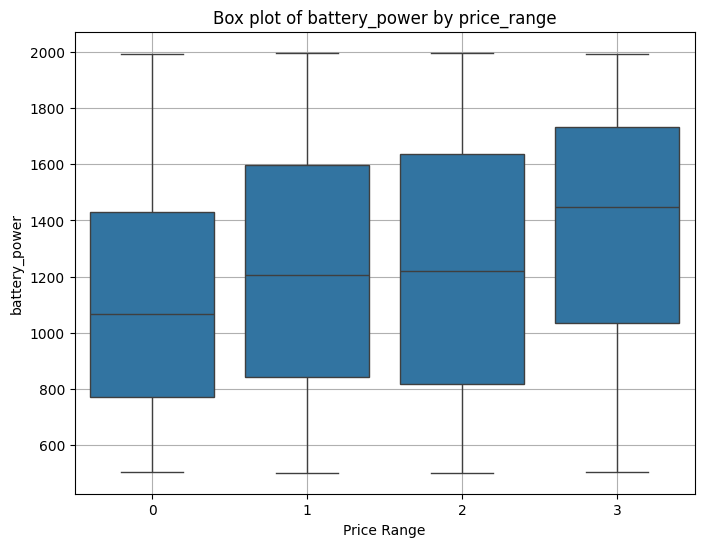

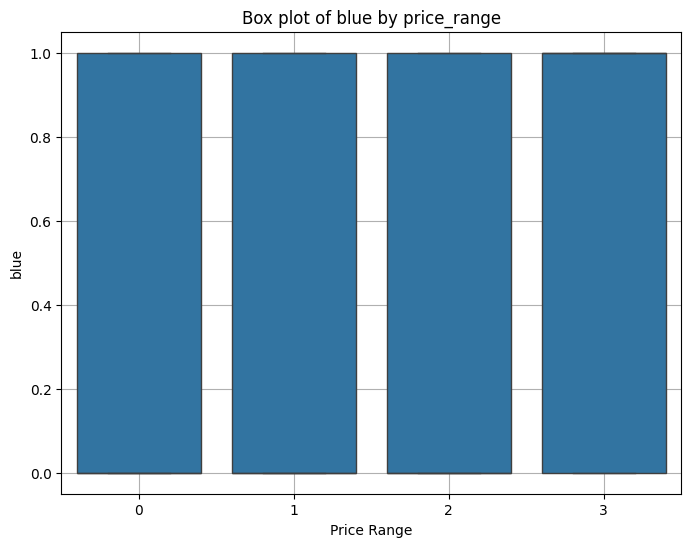

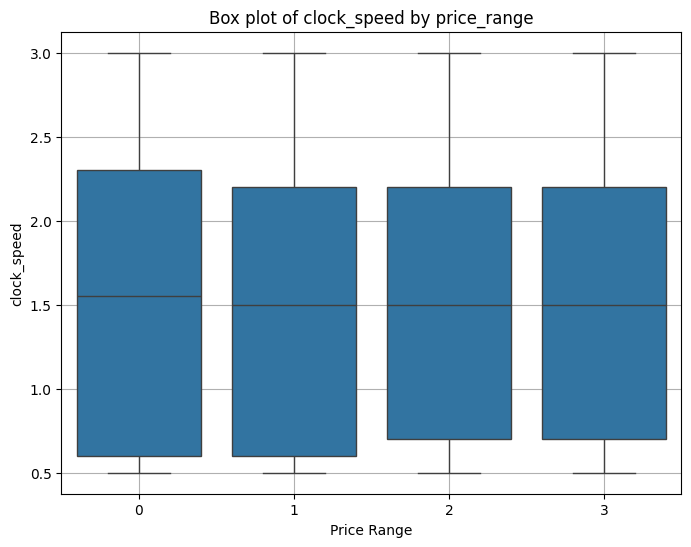

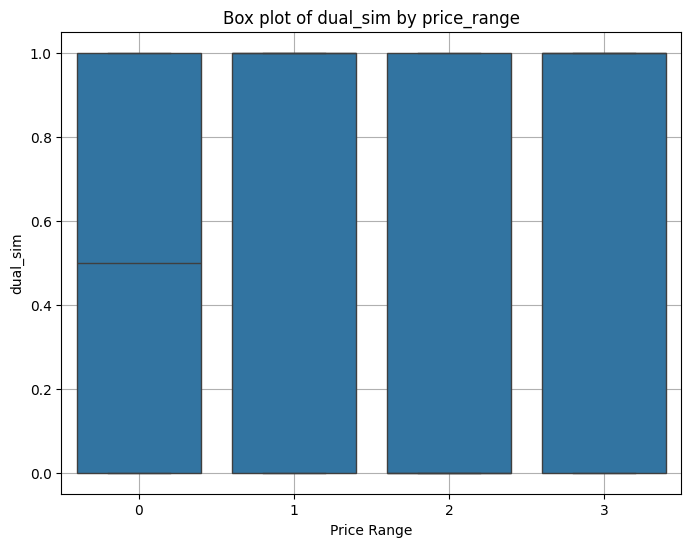

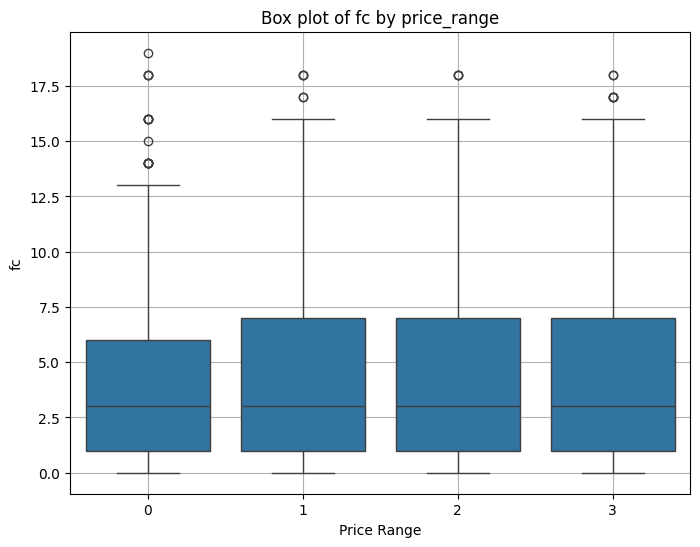

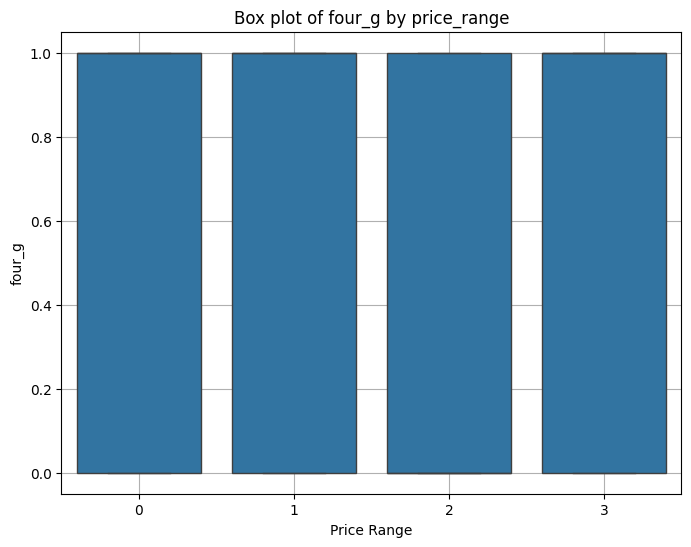

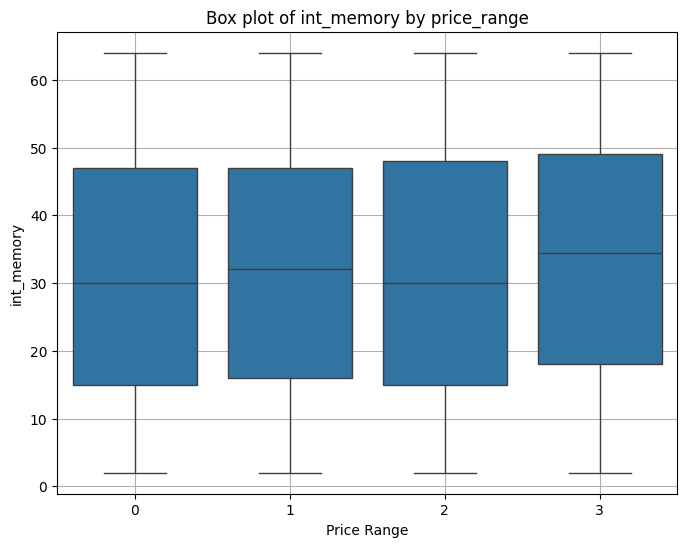

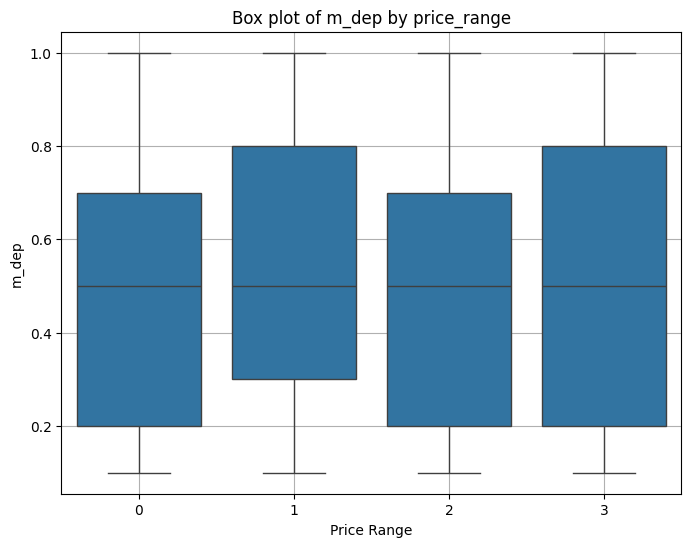

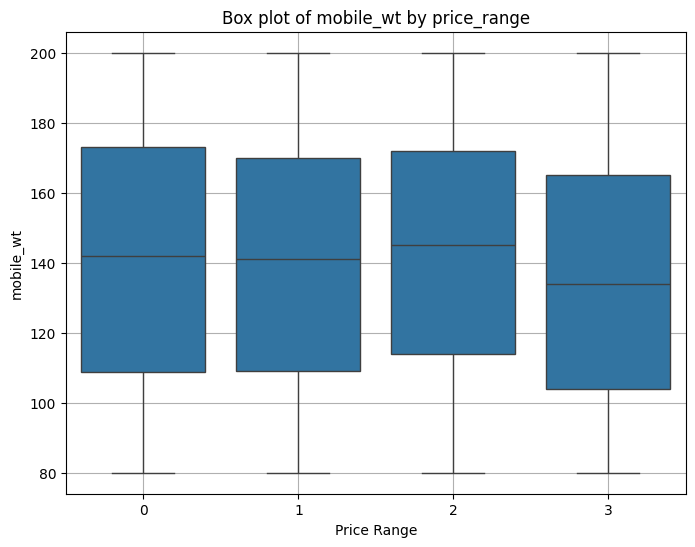

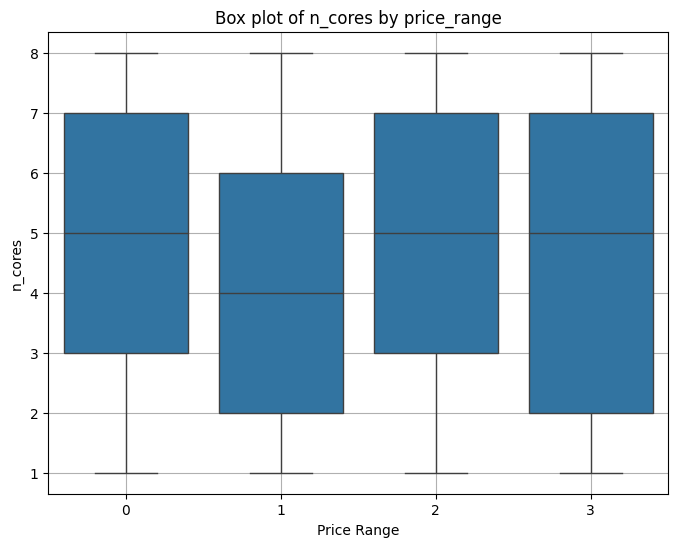

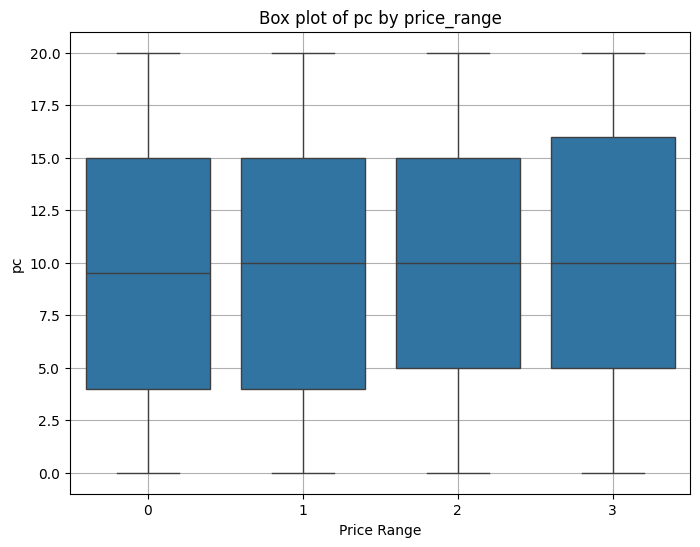

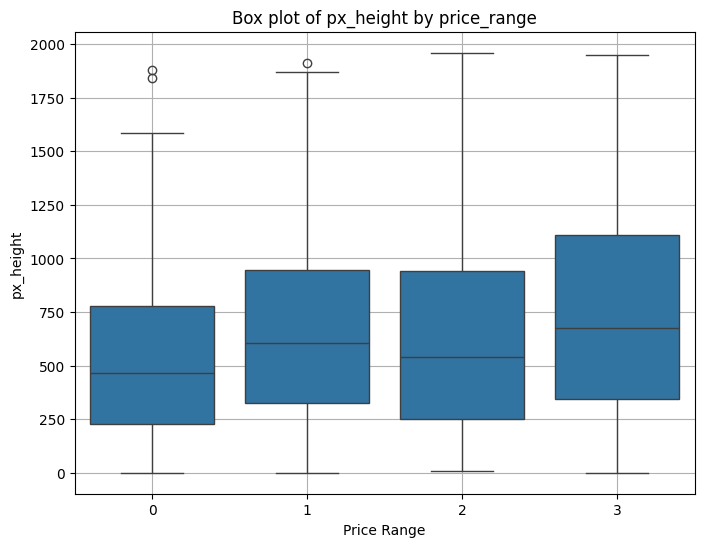

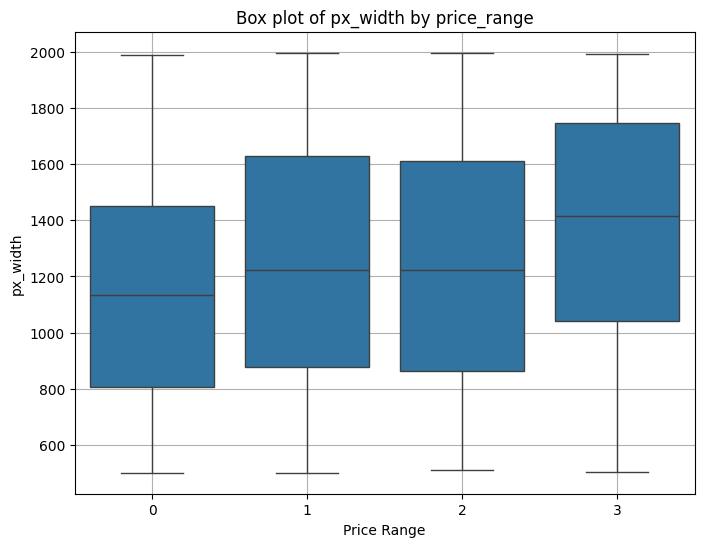

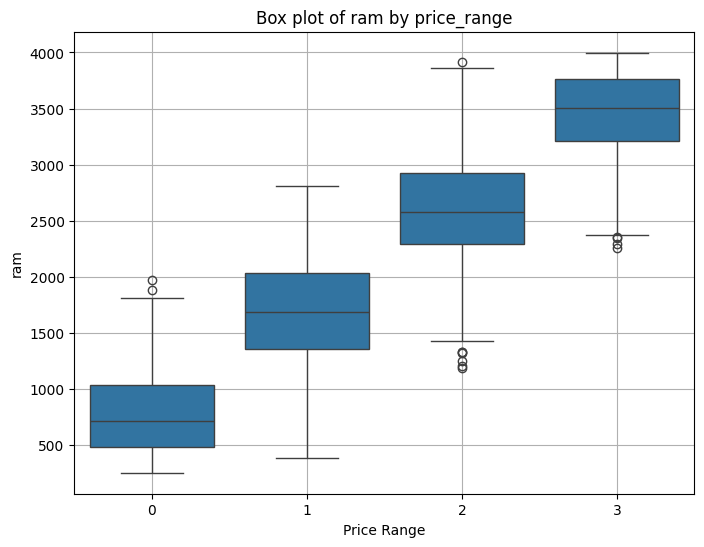

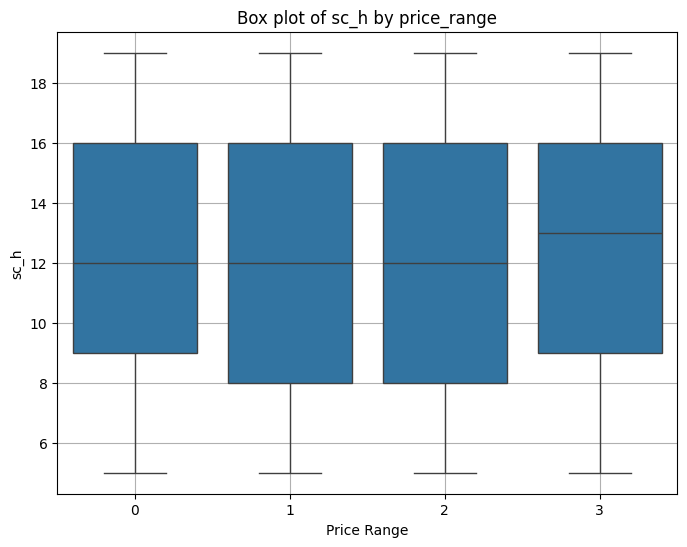

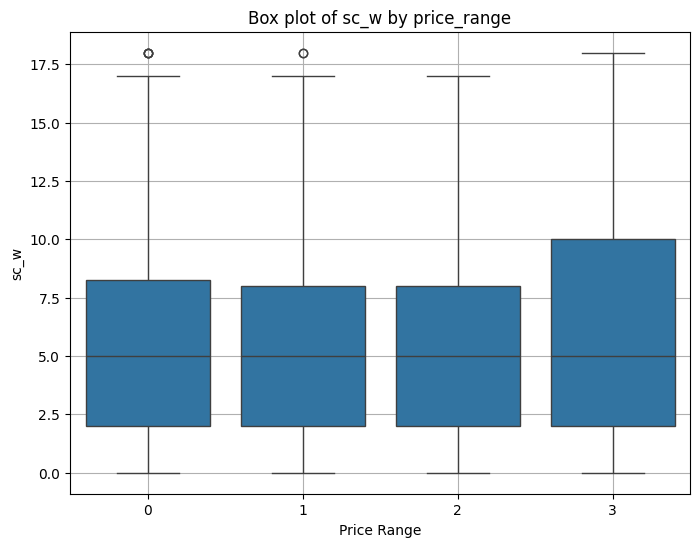

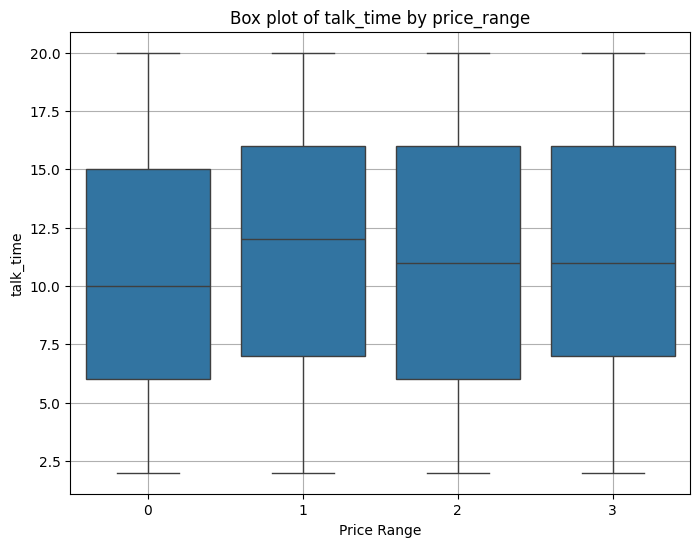

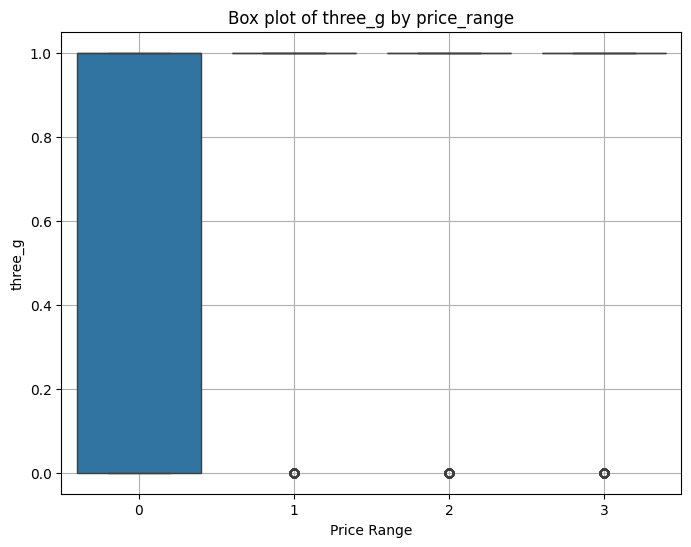

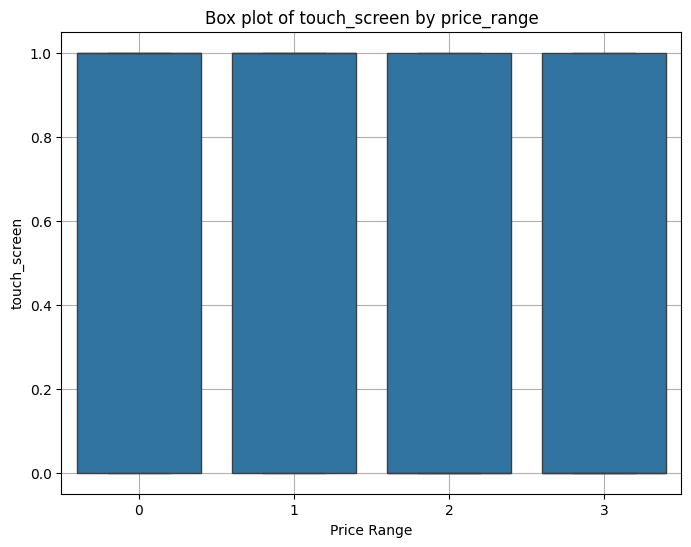

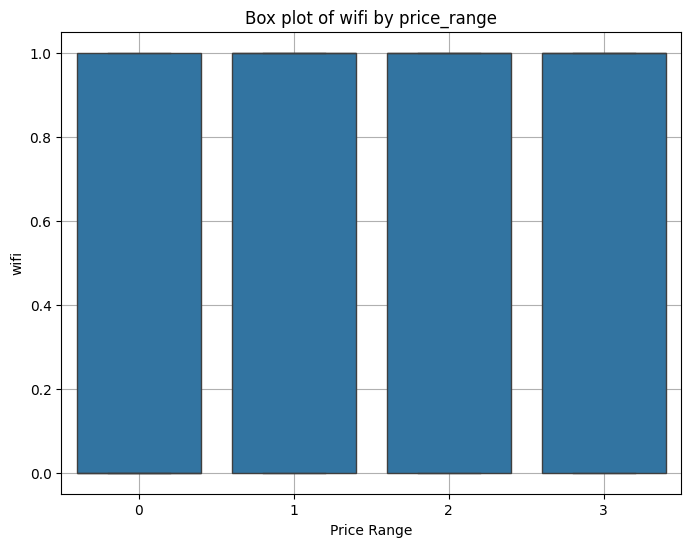

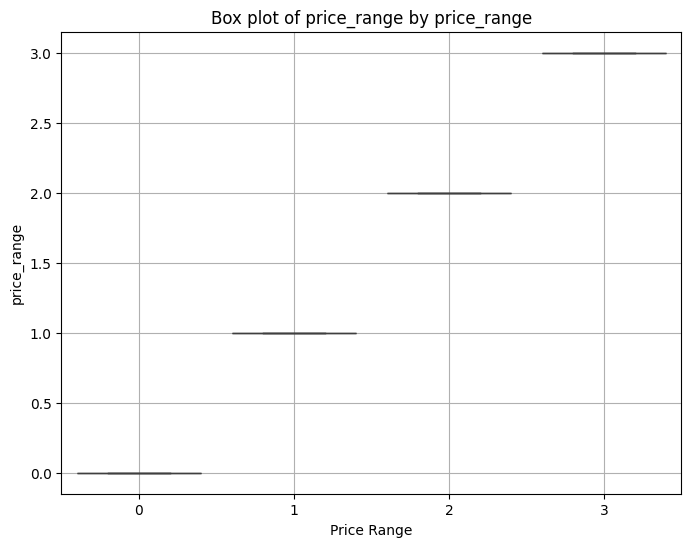

In [47]:


# Histograms for numerical features
for column in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Box plots for numerical features by target variable
for column in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='price_range', y=column)
    plt.title(f'Box plot of {column} by price_range')
    plt.xlabel('Price Range')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()


In [49]:
print(df.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_width   ram  sc_h  sc_w  talk_time  three_g  \
0        188        2  ...       756  2549     9     7         19        0   
1        136        3  ...      1988  2631    17     3          7        1   
2        145        5  ...      1716  2603    11     2          9        1   
3        131        6  ...      1786  2769    16     8         11        1   
4        141        2  ...      1212  1411     8     2         15        1   

   touch_screen  wifi  price_range  battery_power_

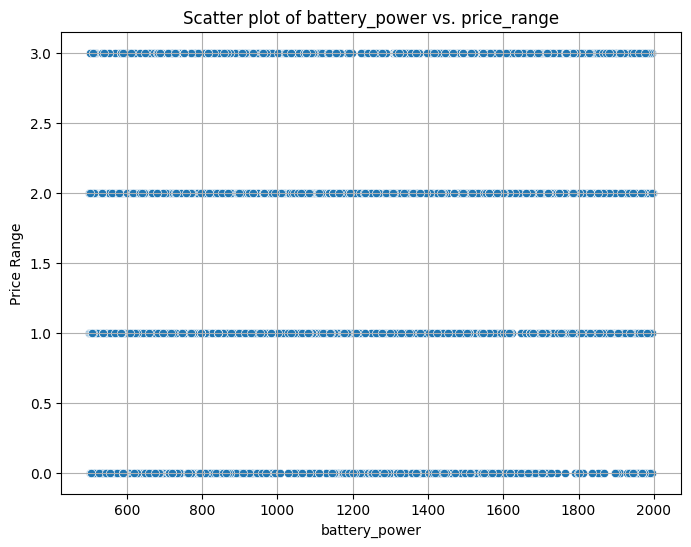

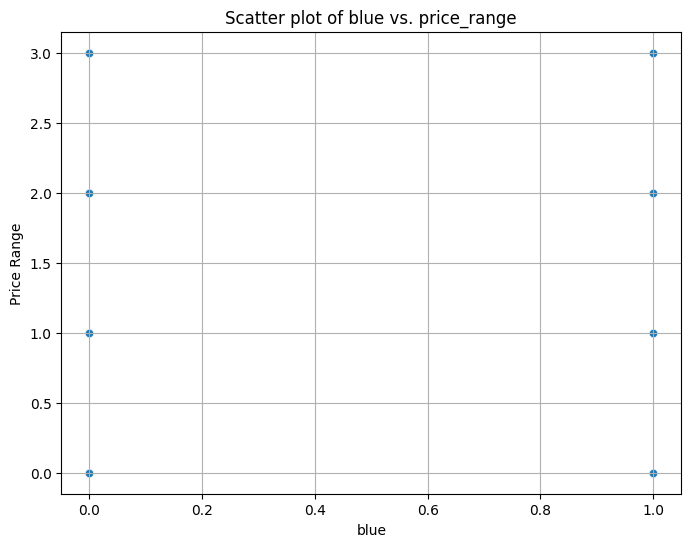

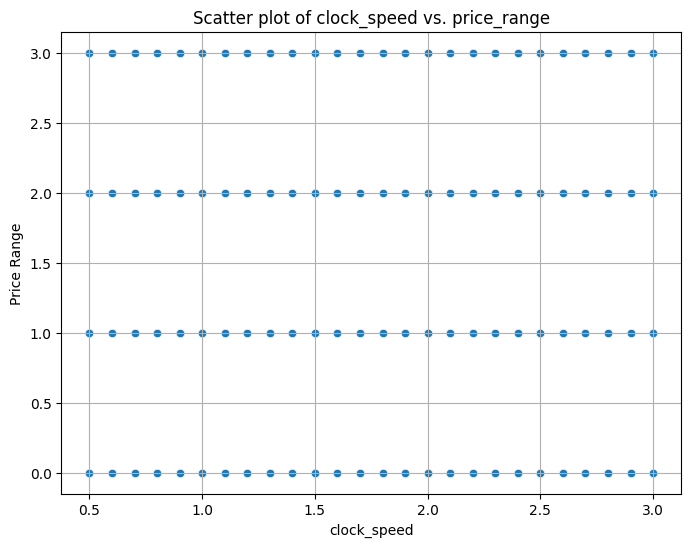

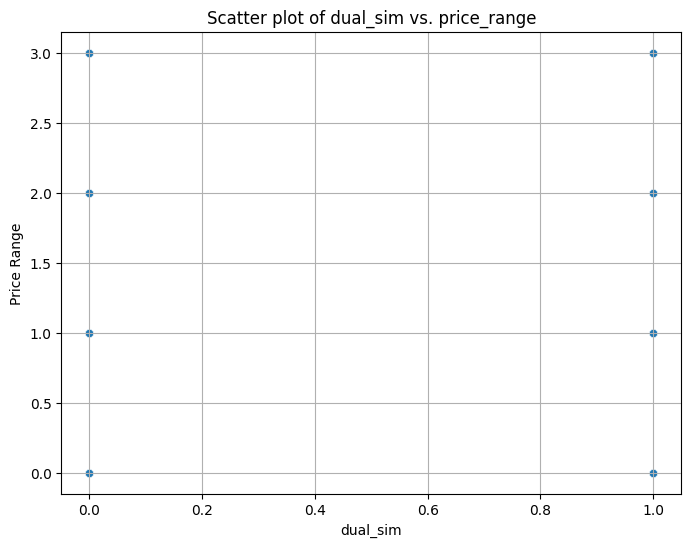

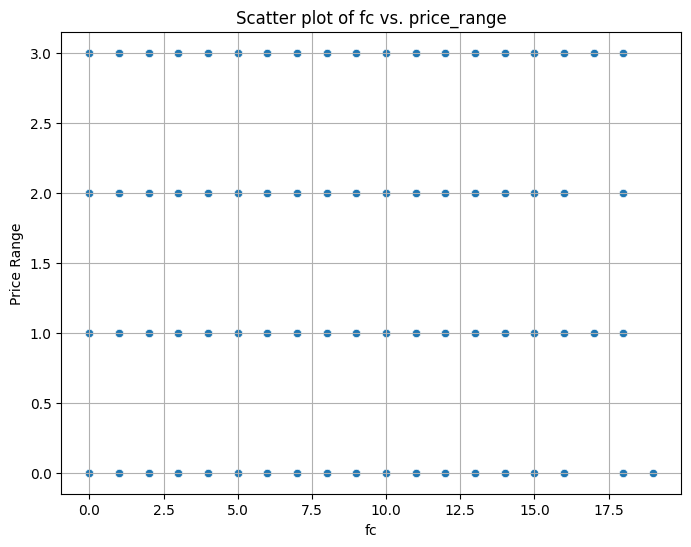

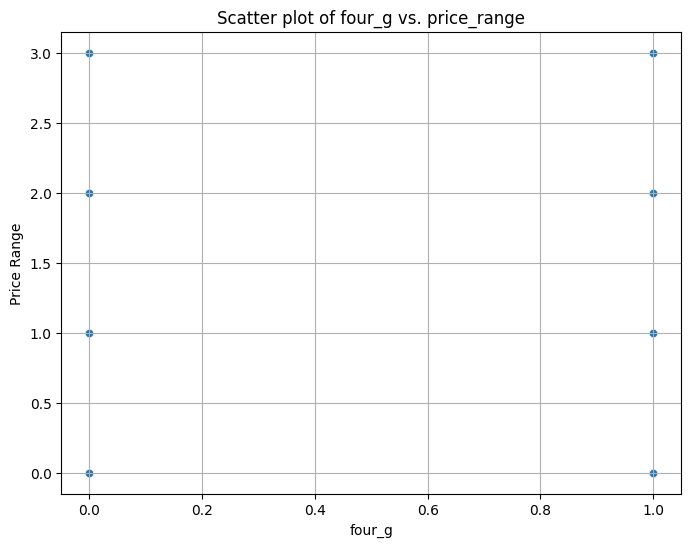

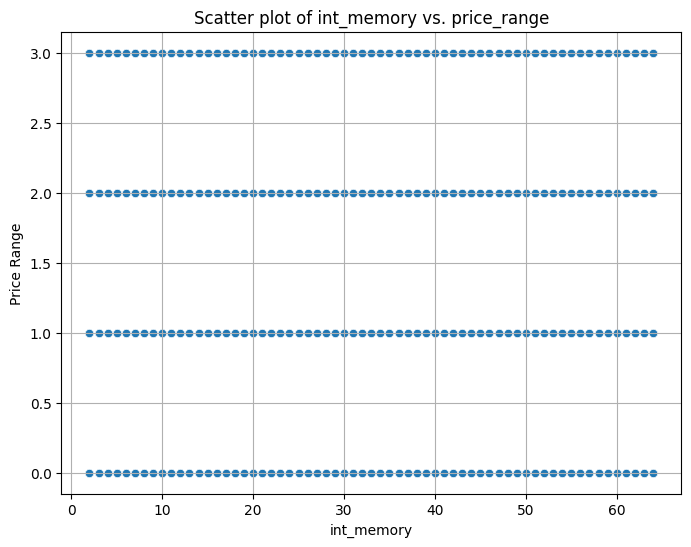

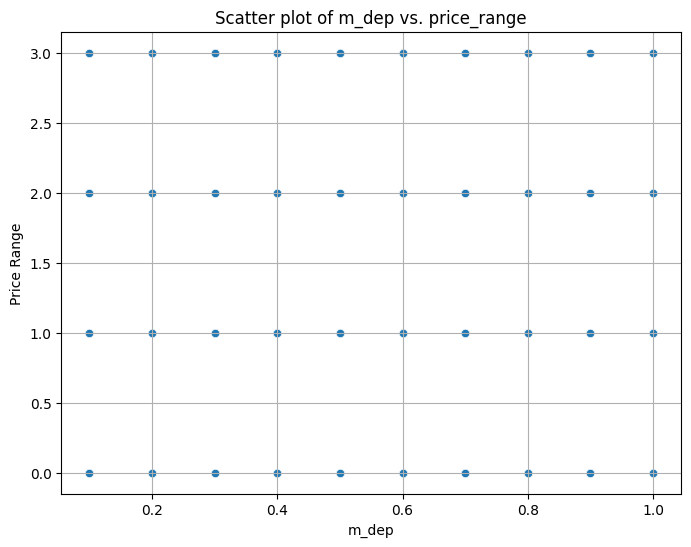

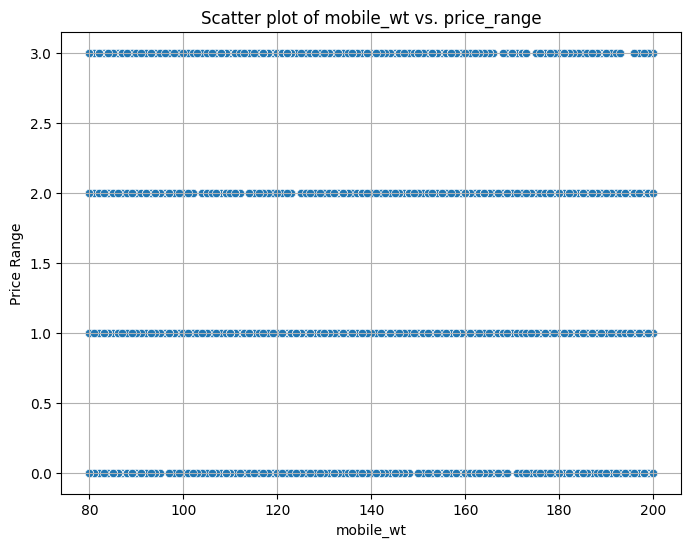

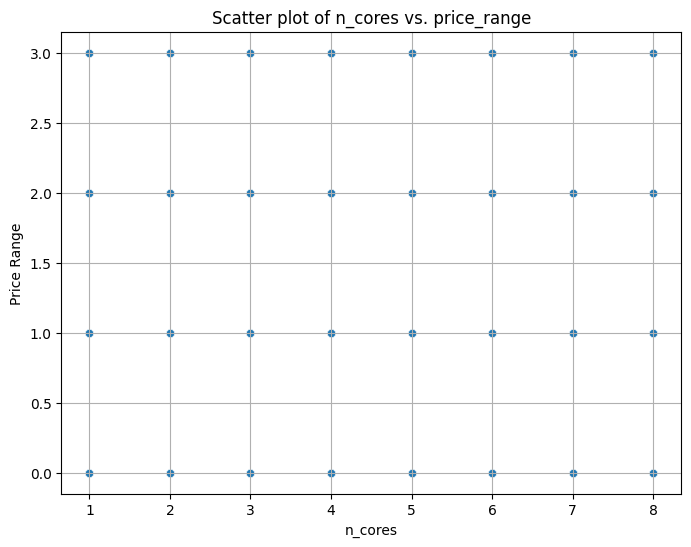

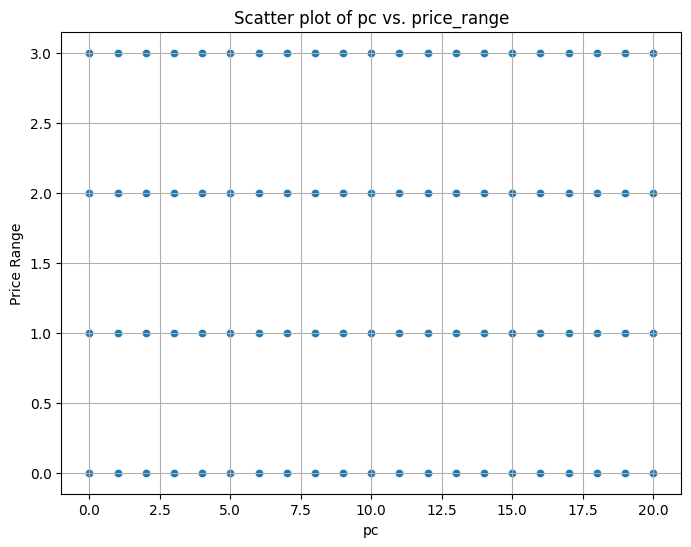

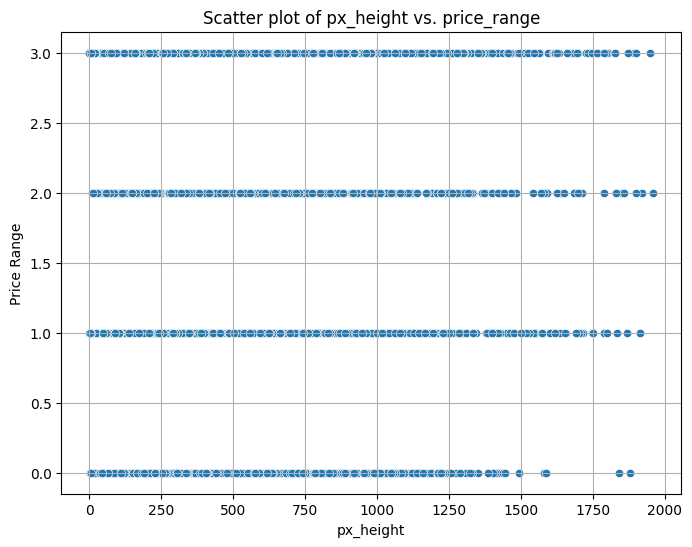

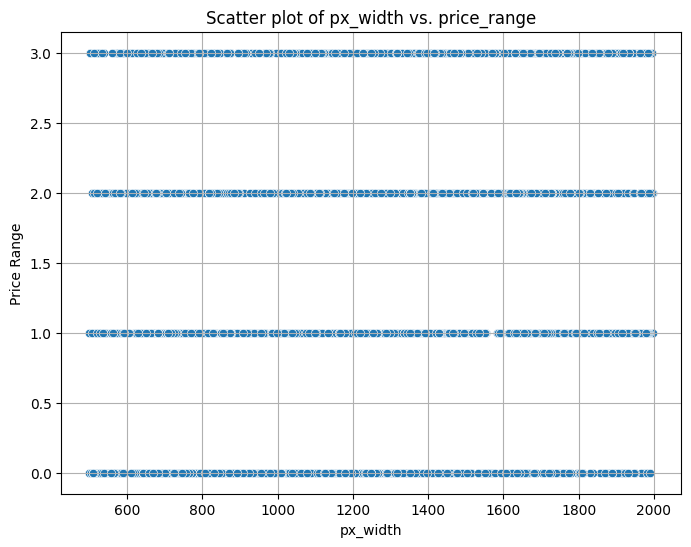

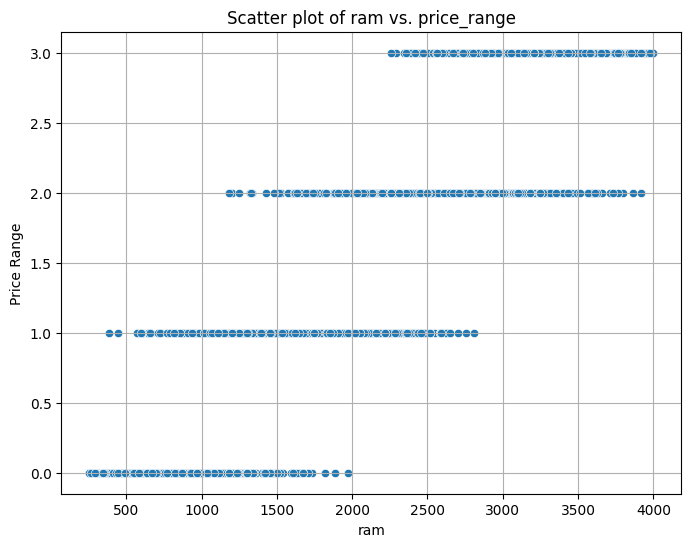

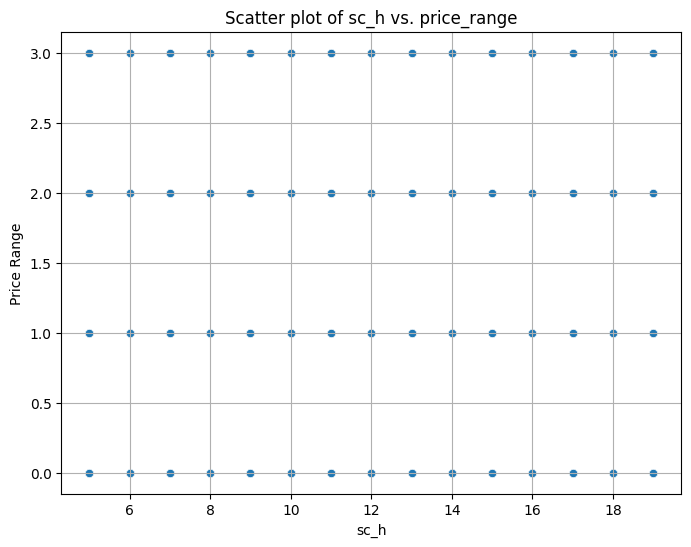

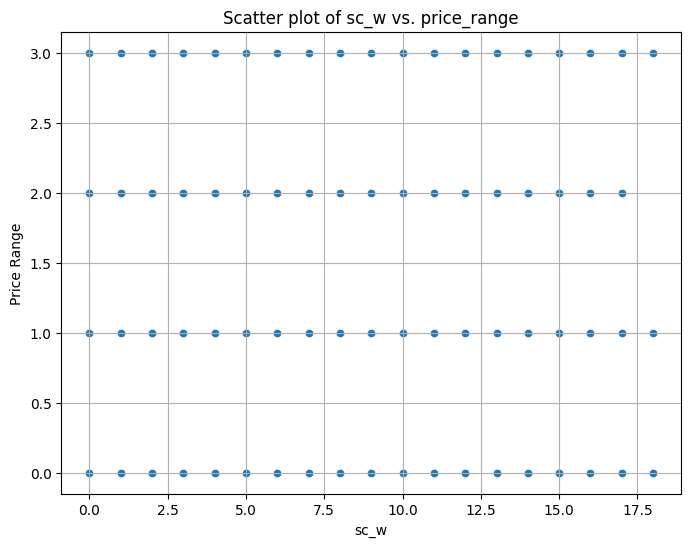

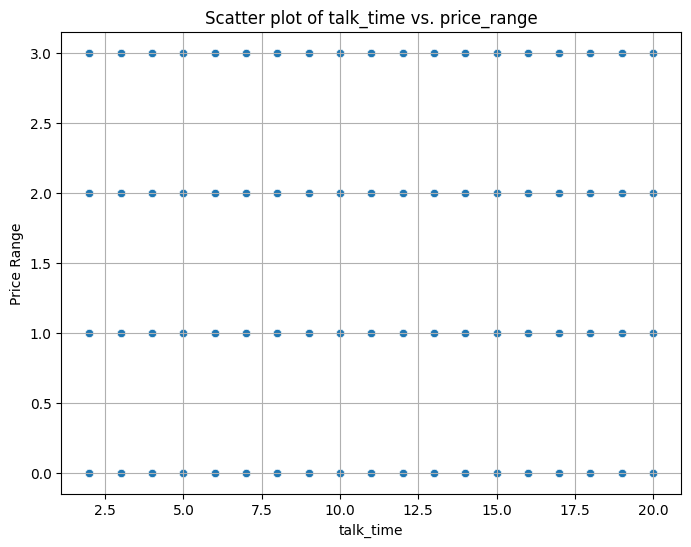

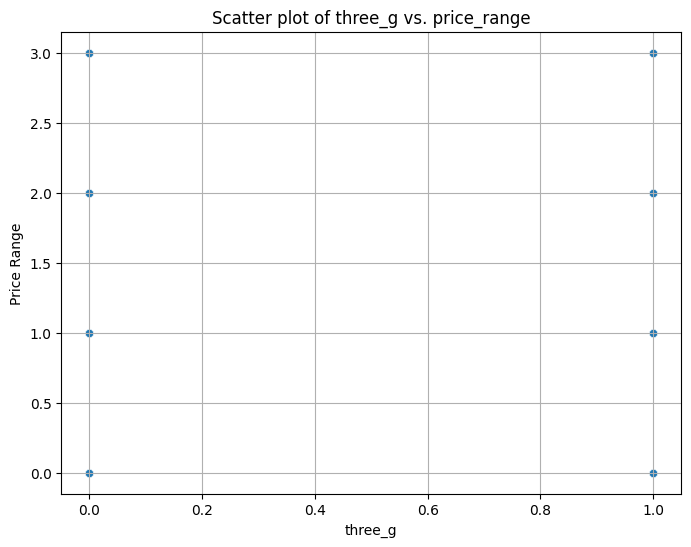

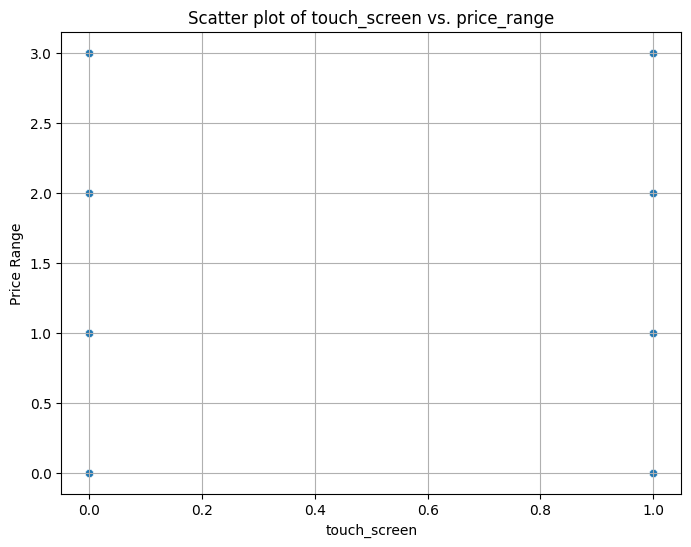

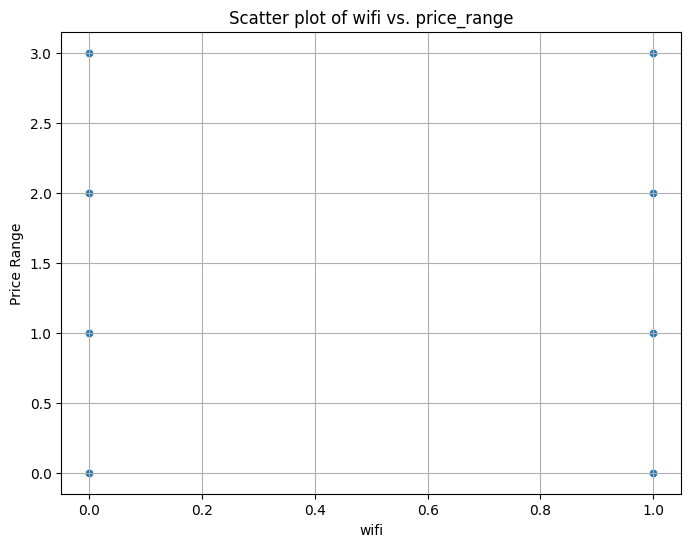

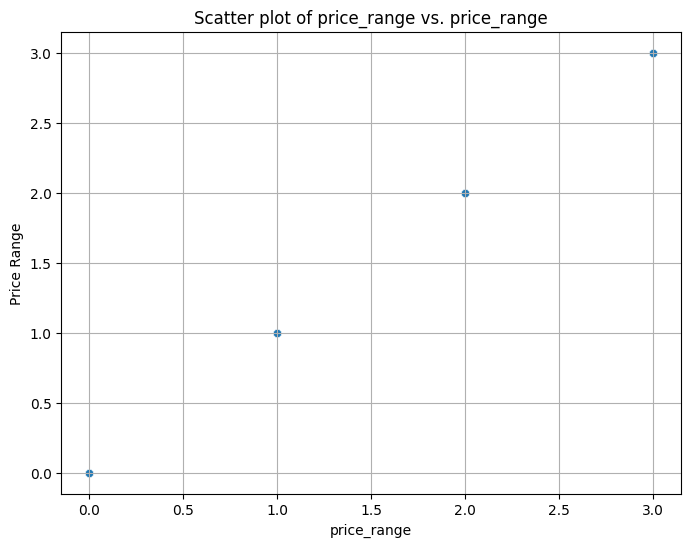

In [50]:
# Scatter plots for numerical features
for column in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=column, y='price_range')
    plt.title(f'Scatter plot of {column} vs. price_range')
    plt.xlabel(column)
    plt.ylabel('Price Range')
    plt.grid(True)
    plt.show()

In [54]:
# Exclude categorical columns from the correlation matrix
numerical_features = df.select_dtypes(include=np.number)
correlation_matrix = numerical_features.corr()

# Extract the correlation coefficients between numerical features and the target variable
correlation_with_target = correlation_matrix['price_range'].sort_values(ascending=False)

print("Correlation coefficients with the target variable (price_range):")
print(correlation_with_target)

Correlation coefficients with the target variable (price_range):
price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


In [55]:
# Calculate the correlation coefficient between Battery Power and RAM
battery_ram_corr = df['battery_power'].corr(df['ram'])
print("Correlation coefficient between Battery Power and RAM:", battery_ram_corr)

Correlation coefficient between Battery Power and RAM: -0.0006529264469276199



These are the correlation coefficients between each numerical feature and the target variable (price_range). Here's a brief interpretation:

Strong positive correlation (> 0.5):
ram: There is a strong positive correlation between RAM and the price range of mobile phones. This suggests that as RAM increases, the price range tends to increase as well.

Moderate positive correlation (0.3 to 0.5):
battery_power, px_width, px_height: These features show moderate positive correlations with the price range. This indicates that as these features increase, the price range tends to increase too, but not as strongly as RAM.

Weak positive correlation (0.1 to 0.3):
int_memory, sc_w, pc, three_g, sc_h, fc, talk_time, blue, wifi, dual_sim, four_g: These features exhibit weak positive correlations with the price range. While they do contribute to predicting the price range, their impact is relatively weaker compared to RAM, battery power, and screen resolution.

Weak negative correlation (< -0.1):
mobile_wt, touch_screen: These features show weak negative correlations with the price range. This suggests that heavier mobile phones and those with touch screens tend to have lower price ranges.

Very weak correlation:
n_cores, m_dep, clock_speed: These features have very weak correlations with the price range, indicating they have little predictive power in determining the price range of mobile phones.

**Correlation Analysis:**

Strong correlations exist between RAM and price range, as well as between certain camera specifications and connectivity features.

Moderate correlations are observed between battery power and price range, indicating its importance in determining phone pricing.

Other features show either weak correlations or no significant correlation with price range, suggesting their limited impact on pricing decisions.

**Variance Analysis:**

Features like Bluetooth, Clock Speed, Mobile Depth, Dual SIM, 4G, 3G, Touch Screen, and WiFi show minimal variability across the dataset.

This indicates that these features are common across different price ranges and may not heavily influence price classification.

**Battery Power Distribution:**
There is a noticeable trend of higher battery capacities in very high-cost phones compared to low-cost ones.

This suggests that premium-priced phones often offer larger battery capacities to support enhanced performance and longer usage times.

**Differences Across Price Categories:**

Significant variations are observed in features such as internal memory, RAM, battery power, and camera specifications across different price categories.

This highlights the diverse range of features available in phones across various price segments.

**Clock Speed Distribution:**

The mode of clock speed at 0.5 GHz indicates a substantial number of phones with lower processor speeds, which may be unexpected given industry trends towards faster processors.

**Key Determinants of Price Classification:**
RAM capacity, camera specifications, and connectivity features emerge as primary determinants of mobile phone prices.

Battery power and talk time also influence price classification, albeit to a lesser extent compared to other features.